# census data analysis

## loading the data set

In [2]:
import pandas as pd
census_data=pd.read_csv("census.csv")

#### adding column names

In [5]:
column=['age','education','martial_status','gender','tax_payer','income','parents_status','country','native','weeks_worked']
census_data=pd.read_csv("census.csv",names=column)
print(column)       

['age', 'education', 'martial_status', 'gender', 'tax_payer', 'income', 'parents_status', 'country', 'native', 'weeks_worked']


In [6]:
census_data.head()  # display top5 data

,age,education,martial_status,gender,tax_payer,income,parents_status,country,native,weeks_worked
0,73,Highschoolgraduate,Widowed,Female,Nonfiler,1700.09,Notinuniverse,United-States,Native-BornintheUnitedStates,0
1,58,Somecollegebutnodegree,Divorced,Male,Headofhousehold,1053.55,Notinuniverse,United-States,Native-BornintheUnitedStates,52
2,18,10thgrade,Nevermarried,Female,Nonfiler,991.95,Notinuniverse,Vietnam,Foreignborn-NotacitizenofUS,0
3,9,Children,Nevermarried,Female,Nonfiler,1758.14,Bothparentspresent,United-States,Native-BornintheUnitedStates,0
4,10,Children,Nevermarried,Female,Nonfiler,1069.16,Bothparentspresent,United-States,Native-BornintheUnitedStates,0


In [7]:
census_data.tail()  # display last 5 data 

,age,education,martial_status,gender,tax_payer,income,parents_status,country,native,weeks_worked
1995,45,Bachelorsdegree(BAABBS),Nevermarried,Male,Single,1353.86,Notinuniverse,United-States,Native-BornintheUnitedStates,52
1996,0,Children,Nevermarried,Male,Nonfiler,1936.23,Bothparentspresent,United-States,Native-BornintheUnitedStates,0
1997,17,10thgrade,Nevermarried,Female,Nonfiler,1951.41,Bothparentspresent,United-States,Native-BornintheUnitedStates,9
1998,10,Children,Nevermarried,Female,Nonfiler,413.50,Fatheronlypresent,United-States,Native-BornintheUnitedStates,0
1999,1,Children,Nevermarried,Female,Nonfiler,562.84,Bothparentspresent,United-States,Native-BornintheUnitedStates,0


## 1.What is the overall distribution of education levels among the population? 

In [8]:
# Get the distribution of education levels

education_distribution = census_data['education'].value_counts()
education_distribution

education
Highschoolgraduate                   483
Children                             452
Somecollegebutnodegree               295
Bachelorsdegree(BAABBS)              206
10thgrade                             81
7thand8thgrade                        81
Mastersdegree(MAMSMEngMEdMSWMBA)      68
11thgrade                             68
Associatesdegree-occup/vocational     56
9thgrade                              56
Associatesdegree-academicprogram      50
5thor6thgrade                         21
Profschooldegree(MDDDSDVMLLBJD)       20
12thgradenodiploma                    18
1st2nd3rdor4thgrade                   16
Doctoratedegree(PhDEdD)               15
Lessthan1stgrade                      14
Name: count, dtype: int64

# to create a bar graph for the education_distribution

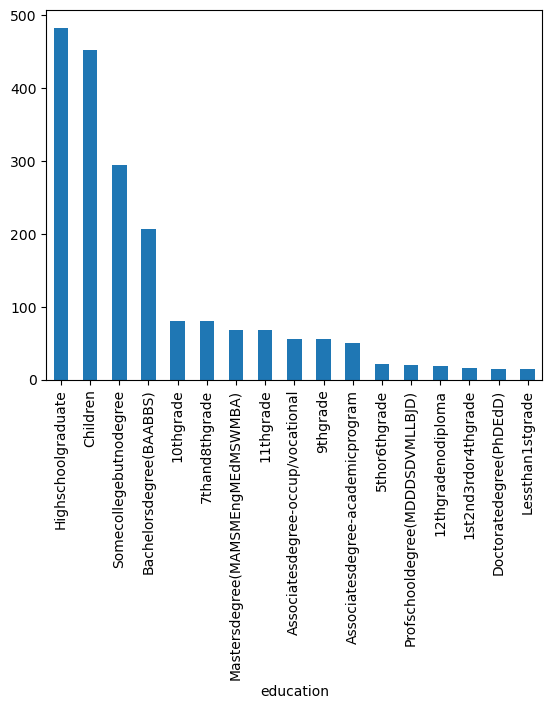

In [9]:
import matplotlib.pyplot as plt
education_distribution.plot(kind='bar')
plt.show()

### to create bar graph of count of education and age

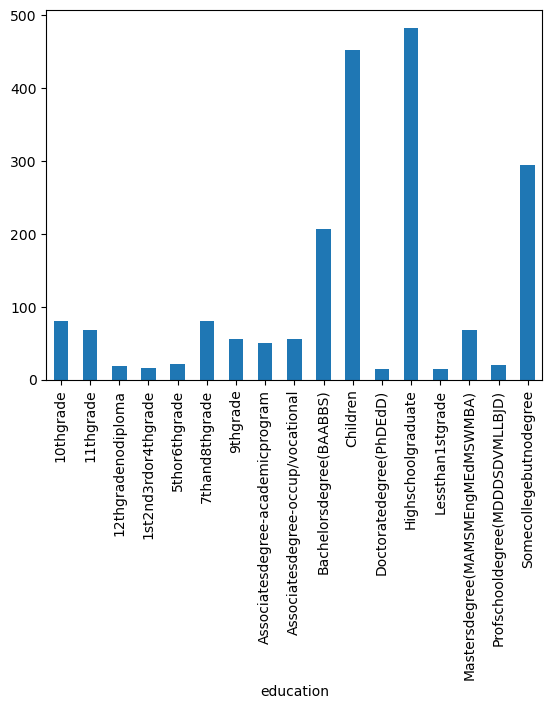

In [11]:
a=census_data.groupby('education')['age'].count()
a.plot(kind='bar')
plt.show() 

In [12]:
print(a)       # count of education and age

education
10thgrade                             81
11thgrade                             68
12thgradenodiploma                    18
1st2nd3rdor4thgrade                   16
5thor6thgrade                         21
7thand8thgrade                        81
9thgrade                              56
Associatesdegree-academicprogram      50
Associatesdegree-occup/vocational     56
Bachelorsdegree(BAABBS)              206
Children                             452
Doctoratedegree(PhDEdD)               15
Highschoolgraduate                   483
Lessthan1stgrade                      14
Mastersdegree(MAMSMEngMEdMSWMBA)      68
Profschooldegree(MDDDSDVMLLBJD)       20
Somecollegebutnodegree               295
Name: age, dtype: int64


## 2. How many people attended college but didn’t graduate (college dropouts)?

In [13]:
college_dropouts = census_data[census_data['education'] == 'Somecollegebutnodegree']
college_dropouts.shape[0]

295

## 3. How many employable females exist in the dataset by education level?

In [14]:
a=census_data[(census_data['gender']=='Female') & (census_data['weeks_worked']>0)]
a
b=a['education'].value_counts()
b

education
Highschoolgraduate                   183
Somecollegebutnodegree               123
Bachelorsdegree(BAABBS)               84
Mastersdegree(MAMSMEngMEdMSWMBA)      30
Associatesdegree-academicprogram      28
11thgrade                             20
Associatesdegree-occup/vocational     19
10thgrade                             16
7thand8thgrade                        11
9thgrade                              10
Profschooldegree(MDDDSDVMLLBJD)        7
5thor6thgrade                          6
1st2nd3rdor4thgrade                    5
12thgradenodiploma                     5
Doctoratedegree(PhDEdD)                5
Name: count, dtype: int64

## 4. Does completing higher education correlate with higher income?

In [15]:
a=census_data.groupby('education')['income'].mean().sort_values()
a

education
Lessthan1stgrade                     1509.856429
12thgradenodiploma                   1583.091667
7thand8thgrade                       1583.932099
5thor6thgrade                        1587.560476
Bachelorsdegree(BAABBS)              1596.193204
Mastersdegree(MAMSMEngMEdMSWMBA)     1601.586912
Associatesdegree-academicprogram     1640.910000
Children                             1645.529292
9thgrade                             1666.718571
11thgrade                            1731.730735
10thgrade                            1733.762099
Associatesdegree-occup/vocational    1777.209821
1st2nd3rdor4thgrade                  1787.718750
Highschoolgraduate                   1837.028385
Somecollegebutnodegree               1845.371966
Doctoratedegree(PhDEdD)              1954.134667
Profschooldegree(MDDDSDVMLLBJD)      2053.327000
Name: income, dtype: float64

## 5. Are high school graduates earning more than 10th-grade individuals on average?

In [16]:
avg_income_by_education = census_data.groupby('education')['income'].mean()
avg_income_by_education

education
10thgrade                            1733.762099
11thgrade                            1731.730735
12thgradenodiploma                   1583.091667
1st2nd3rdor4thgrade                  1787.718750
5thor6thgrade                        1587.560476
7thand8thgrade                       1583.932099
9thgrade                             1666.718571
Associatesdegree-academicprogram     1640.910000
Associatesdegree-occup/vocational    1777.209821
Bachelorsdegree(BAABBS)              1596.193204
Children                             1645.529292
Doctoratedegree(PhDEdD)              1954.134667
Highschoolgraduate                   1837.028385
Lessthan1stgrade                     1509.856429
Mastersdegree(MAMSMEngMEdMSWMBA)     1601.586912
Profschooldegree(MDDDSDVMLLBJD)      2053.327000
Somecollegebutnodegree               1845.371966
Name: income, dtype: float64

### creating a pie graph for average income by education 

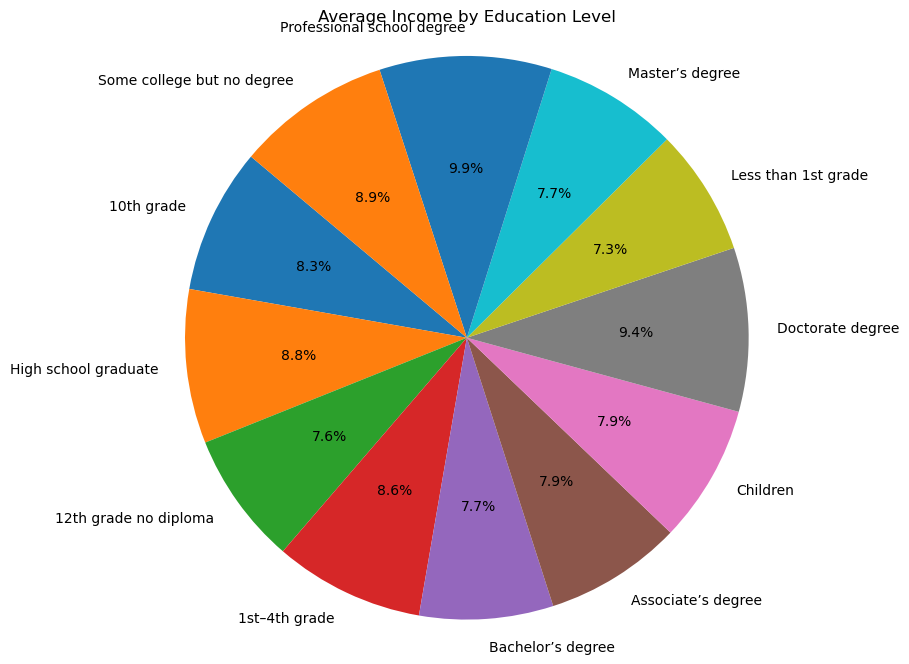

In [22]:
import matplotlib.pyplot as plt

# Retrieve values from dictionary
a = avg_income_by_education.get('10thgrade')
b = avg_income_by_education.get('Highschoolgraduate')
c = avg_income_by_education.get('12thgradenodiploma')
d = avg_income_by_education.get('1st2nd3rdor4thgrade')
e = avg_income_by_education.get('Bachelorsdegree(BAABBS)')
f = avg_income_by_education.get('Associatesdegree-academicprogram')
g = avg_income_by_education.get('Children')
h = avg_income_by_education.get('Doctoratedegree(PhDEdD)')
i = avg_income_by_education.get('Lessthan1stgrade')
j = avg_income_by_education.get('Mastersdegree(MAMSMEngMEdMSWMBA)')
k = avg_income_by_education.get('Profschooldegree(MDDDSDVMLLBJD)')
l = avg_income_by_education.get('Somecollegebutnodegree')

# Labels and corresponding values
labels = [
    '10th grade',
    'High school graduate',
    '12th grade no diploma',
    '1st–4th grade',
    'Bachelor’s degree',
    'Associate’s degree',
    'Children',
    'Doctorate degree',
    'Less than 1st grade',
    'Master’s degree',
    'Professional school degree',
    'Some college but no degree'
]

values = [a, b, c, d, e, f, g, h, i, j, k, l]

# Filter out None values (if any key was missing)
filtered_data = [(lab, val) for lab, val in zip(labels, values) if val is not None]
filtered_labels, filtered_values = zip(*filtered_data)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_values, labels=filtered_labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Income by Education Level')
plt.axis('equal')
plt.show()


### Average Income: 10th Grade vs High School Graduate

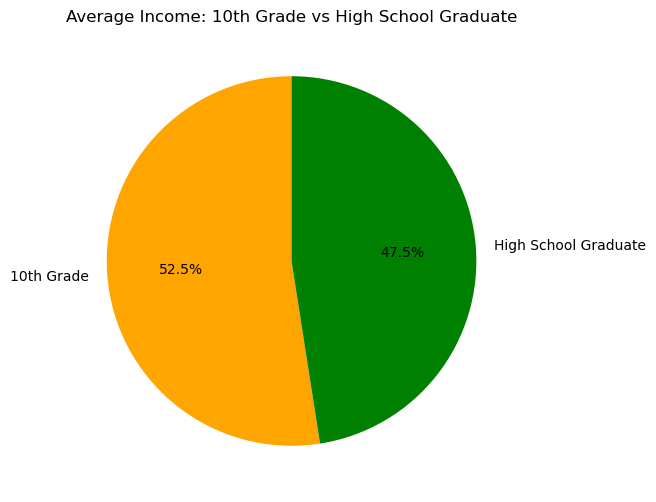

In [23]:
import matplotlib.pyplot as plt

income_values = [991.95, 898.83]  # example values: 10th grade vs High School
labels = ['10th Grade', 'High School Graduate']

plt.figure(figsize=(6,6))
plt.pie(income_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange','green'])
plt.title('Average Income: 10th Grade vs High School Graduate')
plt.show()


## 6. How does marital status vary with education? For example, are divorced or widowed females more likely to have lower education?

In [24]:
edu_marital_gender = census_data.groupby(['education', 'martial_status', 'gender']).size()
edu_marital_gender

education               martial_status                 gender
10thgrade               Divorced                       Male       3
                        Married-civilianspousepresent  Female    16
                                                       Male      14
                        Married-spouseabsent           Female     1
                                                       Male       1
                                                                 ..
Somecollegebutnodegree  Nevermarried                   Male      41
                        Separated                      Female     2
                                                       Male       1
                        Widowed                        Female    10
                                                       Male       1
Length: 135, dtype: int64

### creating bar graph for marital status vary with education,gender

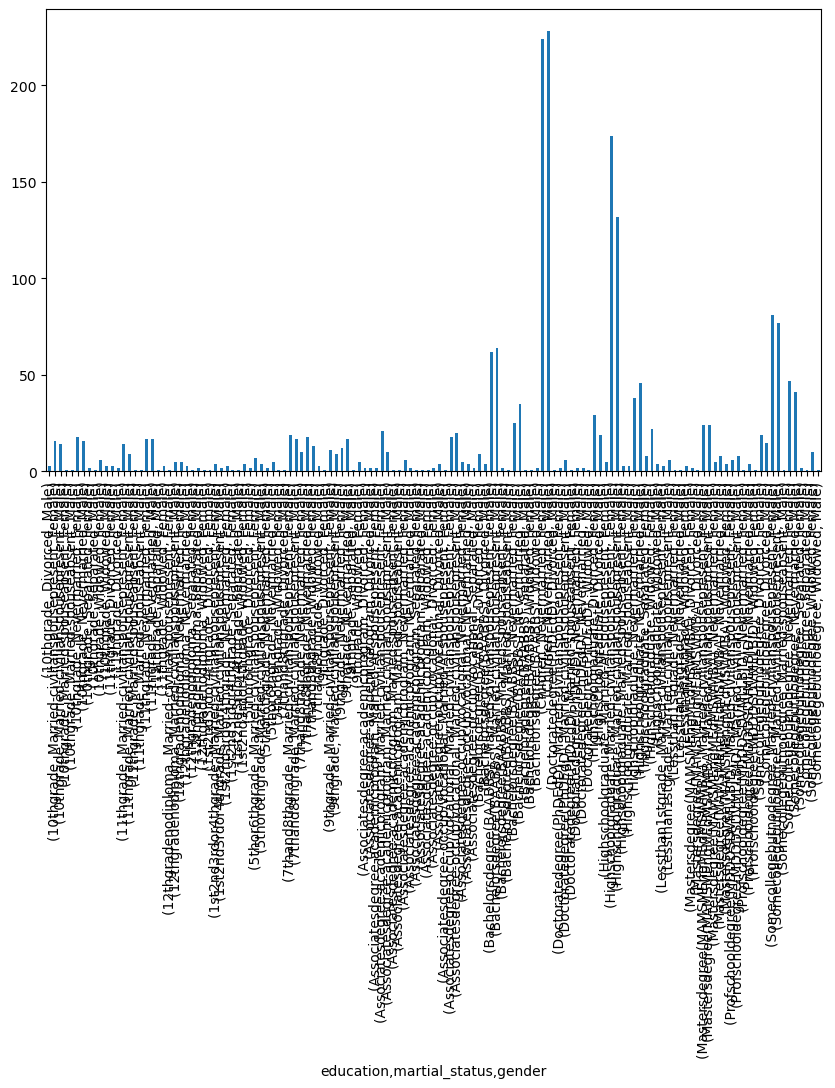

In [46]:
edu_marital_gender.plot(kind='bar',figsize=(10,6))
plt.show()

## 7. In the next 5 years, how many voters will come?


In [25]:
future_voters = census_data[(census_data['age'] >= 13) & (census_data['age'] < 18)]
future_voters.shape[0]

138

# 8. No. of Senior Citizen to get added in next X years

In [26]:
census_data['age'] = pd.to_numeric(census_data['age'], errors='coerce')
# Input — years in the future
x_years = int(input("Enter number of years (X): "))

#  Filter those who will become No. of Senior Citizen to get added
senior_citizen = census_data[
    (census_data['age'] > 55) 
]
# Count and display
print("\nNumber of voters to get added in next", x_years, "years:", len(senior_citizen))

Enter number of years (X):  33



Number of voters to get added in next 33 years: 342


# 9.No. of Voters to get added in next X years

In [54]:
census_data['age'] = pd.to_numeric(census_data['age'], errors='coerce')
# Input — years in the future
x_years = int(input("Enter number of years (X): "))

#  Filter those who will become eligible voters in next X years
new_voters = census_data[
    (census_data['age'] < 18) & 
    ((census_data['age'] + x_years) >= 18)
]
# Count and display
print("\nNumber of voters to get added in next", x_years, "years:", len(new_voters))

Enter number of years (X):  6



Number of voters to get added in next 6 years: 170


# 10. No. of Employable Female Citizens who are Widows or Divorced

In [63]:
x = int(input("Enter number of years (X): "))

Employable_Female = census_data[
    (census_data['gender'] == 'Female') &
    (census_data['martial_status'].isin(['Widowed', 'Divorced'])) &
    (census_data['weeks_worked'] >= 1)
]

print("No. of Employable Female Citizens who are Widows or Divorced:", len(Employable_Female))

Enter number of years (X):  5


No. of Employable Female Citizens who are Widows or Divorced: 80


# 11.No. of Orphans for each category based on Parents Present

In [70]:
census_data['parents_status'].value_counts()


parents_status
Notinuniverse           1472
Bothparentspresent       360
Motheronlypresent        133
Neitherparentpresent      18
Fatheronlypresent         17
Name: count, dtype: int64

# 12.Gender wise Per Capita Income

In [73]:
# Calculate gender-wise per capita income
per_capita_income =census_data .groupby('gender')['income'].mean().reset_index()

# Rename the column for clarity
per_capita_income.rename(columns={'income': 'Per Capita Income'}, inplace=True)

print(per_capita_income)

   gender  Per Capita Income
0  Female        1671.006890
1    Male        1792.955229


# 13. Citizens age above 23 having no employment and highest education

In [33]:
citizens_no_job = census_data[
    (census_data['country'] == 'Citizen') &
    (census_data['age'] > 23) &
    (census_data['tax_payer'] == 'Unemployed')
]

if not citizens_no_job.empty:
    highest_edu = citizens_no_job['education'].mode().iloc[0]
    print("Highest Education among Citizens above 23 with no employment:", highest_edu)
else:
    print("No citizens above 23 found with no employment.")

No citizens above 23 found with no employment.


# 14. Per Capita Income for the entire population

In [75]:
# Per Capita Income for the entire population
per_capita_income = census_data['income'].mean()
print("Per Capita Income:", per_capita_income)

Per Capita Income: 1728.261635


# 15. No of employable widows and divorced

In [82]:
# Filter employable female widows or divorced
result = census_data[
    (census_data['gender'] == "Female") &
    (census_data['martial_status'].isin(["Widowed", "Divorced"])) &
    (~census_data['education'].str.contains("Children", case=False, na=False))
]

# Display the filtered data
print(result)

# Display the count
print(len(result))

      age                education martial_status  gender tax_payer   income  \
0      73       Highschoolgraduate        Widowed  Female  Nonfiler  1700.09   
13     46       Highschoolgraduate       Divorced  Female    Single   978.16   
34     81  Bachelorsdegree(BAABBS)        Widowed  Female    Single   463.55   
60     90           7thand8thgrade        Widowed  Female  Nonfiler  3666.39   
62     49  Bachelorsdegree(BAABBS)       Divorced  Female    Single   946.47   
...   ...                      ...            ...     ...       ...      ...   
1878   56       Highschoolgraduate       Divorced  Female    Single  1183.76   
1883   74   Somecollegebutnodegree        Widowed  Female    Single   236.42   
1912   47       Highschoolgraduate       Divorced  Female    Single  2524.83   
1913   42   Somecollegebutnodegree       Divorced  Female    Single  1781.84   
1962   22                 9thgrade       Divorced  Female    Single  2355.42   

     parents_status        country     

# 16. Age above 60 citizens and non-citizens

In [87]:
# Filter age above 60
age_above_60 = census_data[census_data['age'] > 60]

# Split into citizens and non-citizens
citizens = age_above_60[age_above_60['native'] == 'United-States']
non_citizens = age_above_60[age_above_60['native'] != 'United-States']

# Display counts
print(f"Total people aged above 60: {len(age_above_60)}")
print(f"Citizens aged above 60: {len(citizens)}")
print(f"Non-Citizens aged above 60: {len(non_citizens)}")

# Optional: show sample records
print("\nCitizens aged above 60:")
print(citizens[['age', 'gender', 'education', 'income', 'native']].head())

print("\nNon-Citizens aged above 60:")
print(non_citizens[['age', 'gender', 'education', 'income', 'native']].head())


Total people aged above 60: 264
Citizens aged above 60: 0
Non-Citizens aged above 60: 264

Citizens aged above 60:
Empty DataFrame
Columns: [age, gender, education, income, native]
Index: []

Non-Citizens aged above 60:
    age  gender                education   income  \
0    73  Female       Highschoolgraduate  1700.09   
30   63    Male         Lessthan1stgrade   711.15   
34   81  Female  Bachelorsdegree(BAABBS)   463.55   
42   66  Female           7thand8thgrade  4183.26   
44   84  Female       Highschoolgraduate  3494.72   

                          native  
0   Native-BornintheUnitedStates  
30   Foreignborn-NotacitizenofUS  
34  Native-BornintheUnitedStates  
42  Native-BornintheUnitedStates  
44  Native-BornintheUnitedStates  


# 17.Money generated for non-citizens

In [89]:
# Filter non-citizens (assuming 'United-States' means citizen)
non_citizens = census_data[census_data['native'] != 'United-States']

# Convert income column to numeric (in case of text or symbols)
non_citizens['income'] = pd.to_numeric(non_citizens['income'], errors='coerce')

# Calculate total income
total_income_non_citizens = non_citizens['income'].sum()

print(" Total income generated by non-citizens:", total_income_non_citizens)

 Total income generated by non-citizens: 3456523.27


# 18. Education Qualification Count based on Employment

In [92]:
#Education Qualification Count based on Employment
education_employment = census_data.groupby(['education', 'tax_payer']).size().reset_index(name='Count')
print("Education Qualification Count based on Employment:\n", education_employment)

Education Qualification Count based on Employment:
                  education               tax_payer  Count
0                10thgrade         Headofhousehold      2
1                10thgrade            Jointboth65+      2
2                10thgrade        Jointbothunder65     20
3                10thgrade  Jointoneunder65&one65+      3
4                10thgrade                Nonfiler     40
..                     ...                     ...    ...
79  Somecollegebutnodegree            Jointboth65+     10
80  Somecollegebutnodegree        Jointbothunder65    139
81  Somecollegebutnodegree  Jointoneunder65&one65+      5
82  Somecollegebutnodegree                Nonfiler     25
83  Somecollegebutnodegree                  Single     90

[84 rows x 3 columns]


# 19.No of non-citizens working %

In [37]:
total_non_citizens = census_data[census_data['country'] != 'Citizen'].shape[0]
working_non_citizens = census_data[(census_data['country'] != 'Citizen') & (census_data['tax_payer'] != 'Unemployed')].shape[0]

percent_working = (working_non_citizens / total_non_citizens) * 100
print("Percentage of Non-Citizens Working:", percent_working)

Percentage of Non-Citizens Working: 100.0


 # 20.  Age above 60 citizens and non-citizens

In [38]:
age_above_60 = census_data[census_data['age'] > 60].groupby('country').size().reset_index(name='Count')
print("Age above 60 Citizens and Non-Citizens:\n", age_above_60)


Age above 60 Citizens and Non-Citizens:
                country  Count
0                    ?      3
1               Canada      1
2                China      1
3                 Cuba      1
4   Dominican-Republic      2
5              England      2
6              Germany      3
7              Hungary      1
8                India      1
9                Italy      3
10              Mexico      4
11              Poland      3
12         Puerto-Rico      3
13       United-States    236


# 21.No of children parents category-wise gender-wise


In [40]:
children_category = census_data.groupby(['parents_status', 'gender']).size().reset_index(name='Count')
print("Number of Children (Parents Category-wise & Gender-wise):\n", children_category)


Number of Children (Parents Category-wise & Gender-wise):
          parents_status  gender  Count
0    Bothparentspresent  Female    167
1    Bothparentspresent    Male    193
2     Fatheronlypresent  Female      7
3     Fatheronlypresent    Male     10
4     Motheronlypresent  Female     77
5     Motheronlypresent    Male     56
6  Neitherparentpresent  Female      8
7  Neitherparentpresent    Male     10
8         Notinuniverse  Female    802
9         Notinuniverse    Male    670


# 22. No of widow female candidates

In [48]:
widow_females = census_data[(census_data['gender'] == 'Female') & (census_data['martial_status'] == 'Widowed')]
print("Number of Widow Female Candidates:", widow_females.shape[0])


Number of Widow Female Candidates: 75


# 23 Education category-wise gender-wise count

In [43]:

edu_gender_count = census_data.groupby(['education', 'gender']).size().reset_index(name='Count')
print("Education Category-wise Gender-wise Count:\n", edu_gender_count)


Education Category-wise Gender-wise Count:
                             education  gender  Count
0                           10thgrade  Female     43
1                           10thgrade    Male     38
2                           11thgrade  Female     38
3                           11thgrade    Male     30
4                  12thgradenodiploma  Female      8
5                  12thgradenodiploma    Male     10
6                 1st2nd3rdor4thgrade  Female     13
7                 1st2nd3rdor4thgrade    Male      3
8                       5thor6thgrade  Female     12
9                       5thor6thgrade    Male      9
10                     7thand8thgrade  Female     42
11                     7thand8thgrade    Male     39
12                           9thgrade  Female     29
13                           9thgrade    Male     27
14   Associatesdegree-academicprogram  Female     34
15   Associatesdegree-academicprogram    Male     16
16  Associatesdegree-occup/vocational  Female     26
17

# 24   Calculate Sex Ratio (Male : Female)

In [45]:

males = (census_data['gender'].str.lower() == 'male').sum()
females =(census_data['gender'].str.lower() == 'female').sum()
print(f"Sex Ratio (Male : Female) = {males/females:.2f} : 1" if females else "No female data found.")

Sex Ratio (Male : Female) = 0.89 : 1


# 25 Total Income of different types of Tax Payers

In [46]:

census_data['income'] = pd.to_numeric(census_data['income'], errors='coerce')
taxpayer_income = census_data.groupby('parents_status')['income'].sum().sort_values(ascending=False)
print(" Total Income of Different Types of Tax Payers:\n")
print(taxpayer_income)

 Total Income of Different Types of Tax Payers:

parents_status
Notinuniverse           2580919.29
Bothparentspresent       591594.55
Motheronlypresent        225072.14
Neitherparentpresent      30912.77
Fatheronlypresent         28024.52
Name: income, dtype: float64


# 26. Total Tax To Be collected

In [47]:
census_data['income'] = pd.to_numeric(census_data['income'], errors='coerce')
tax_rate = 0.10  # 10% tax
gender_tax = census_data.groupby('gender')['income'].sum() * tax_rate
gender_tax['Total'] = gender_tax.sum()
print("Total Tax To Be Collected (by gender):\n", gender_tax)


Total Tax To Be Collected (by gender):
 gender
Female    177293.831
Male      168358.496
Total     345652.327
Name: income, dtype: float64


# 27. Pension Amount to be added after x years